<a href="https://colab.research.google.com/github/EduGalvan/bankruptcy-prediction/blob/main/NN_get().ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# load dataset
df = pd.read_csv("bancos.csv")



In [ ]:
X = df[df.columns[1:-1]]
X = X[0:-6]
X

In [ ]:
Y = df[df.columns[-1:]]
Y.dropna(inplace = True)
Y

In [ ]:
X.shape

(60, 9)

In [ ]:
def create_baseline():
  model = Sequential()
  model.add(Dense(120,activation = 'relu'))
  model.add(Dense(60, activation = 'relu'))
  model.add(Dense(30, activation = 'relu'))
  model.add(Dense(1 , activation = 'sigmoid'))
  model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  return model


In [ ]:
estimator = KerasClassifier(create_baseline, epochs=100, batch_size=32, verbose=0)

<ipython-input-13-f26c325158cd>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(create_baseline, epochs=100, batch_size=32, verbose=0)


In [ ]:
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 85.00% (17.40%)


In [ ]:
model = create_baseline()

In [ ]:
loss = model.fit(X, Y, epochs = 90)

Text(0.5, 0, 'Iteración')

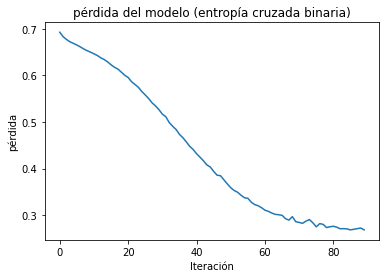

In [ ]:
plt.plot(loss.history['loss'])
plt.title('pérdida del modelo (entropía cruzada binaria)')
plt.ylabel('pérdida')
plt.xlabel('Iteración')



Text(0.5, 0, 'Iteración')

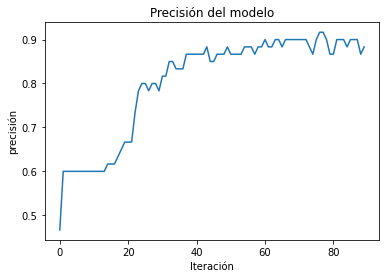

In [ ]:
plt.plot(loss.history['accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('precisión')
plt.xlabel('Iteración')


In [ ]:
model.save('x_model')

In [ ]:
reconstructed_model = keras.models.load_model('x_model')

In [ ]:
predictions = reconstructed_model.predict(X)

2/2 [==============================] - 0s 7ms/step


In [ ]:
results1 = reconstructed_model.evaluate(X, Y, batch_size=128)
print("test loss, test acc:", results)

1/1 [==============================] - 0s 138ms/step - loss: 0.2720 - accuracy: 0.8833
test loss, test acc: [1.         0.66666669 1.         0.83333331 0.66666669 1.
 0.66666669 1.         1.         1.        ]
